In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
%matplotlib inline

In [2]:
train = pd.read_csv('../Wikipedia/train_1.csv').fillna(0)

In [3]:
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
#train.dropna(axis=0)

In [5]:
#Dropping Page Column
train = train.drop('Page',axis = 1)

In [6]:
train.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
train.iloc[:1]

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0


In [8]:
'''
Converting dataframe into numpy array
sample = train.iloc[13890:13891]
series = np.array(sample)
series = series.flatten()
series = np.log1p(series)
print(series.shape)
'''

'\nConverting dataframe into numpy array\nsample = train.iloc[13890:13891]\nseries = np.array(sample)\nseries = series.flatten()\nseries = np.log1p(series)\nprint(series.shape)\n'

In [9]:
sample = train.iloc[13890:13891]

In [10]:
series = np.array(sample)
series = series.flatten()
print(series.shape)

(550,)


In [11]:
print(series)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  3.  0.  2.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  2.  0.  0.  0.  0.
  0.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  0.  0.  0

In [12]:

n_windows = 38   
n_input =  1
n_output = 1
size_train = 533

## Split data
strain = series[:size_train]
stest = series[size_train:]
print(strain.shape, stest.shape)

(533,) (17,)


In [13]:
# x_data = strain[:size_train-1] : Select all the training instance minus one day
# X_batches = x_data.reshape(-1, windows, input) : create the right shape for the batch e.g (10, 20, 1)

def create_batches(df, windows, input, output):
    ## Create X         
        x_data = strain[:size_train-1] # Select the data
        X_batches = x_data.reshape(-1, windows, input)  # Reshape the data 
    ## Create y
        y_data = strain[n_output:size_train]
        y_batches = y_data.reshape(-1, windows, output)
        return X_batches, y_batches

In [14]:
X_batches, y_batches = create_batches(df = strain,
                                      windows = n_windows,
                                      input = n_input,
                                      output = n_output)

In [15]:
print(X_batches.shape, y_batches.shape)

(14, 38, 1) (14, 38, 1)


In [16]:
X_test, y_test = create_batches(df = stest, windows = 38,input = 1, output = 1)
print(X_test.shape, y_test.shape)

(14, 38, 1) (14, 38, 1)


In [17]:
import tensorflow as tf

C:\Users\deepa\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [18]:
## 1. Construct the tensors
X = tf.placeholder(tf.float32, [None, n_windows, n_input])   
y = tf.placeholder(tf.float32, [None, n_windows, n_output])

In [19]:
r_neuron = 120

In [20]:
## 2. create the model
basic_cell = tf.contrib.rnn.BasicRNNCell(num_units=r_neuron, activation=tf.nn.relu)   
rnn_output, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)   

In [21]:
stacked_rnn_output = tf.reshape(rnn_output, [-1, r_neuron])          
stacked_outputs = tf.layers.dense(stacked_rnn_output, n_output)       
outputs = tf.reshape(stacked_outputs, [-1, n_windows, n_output]) 

In [22]:
## 3. Loss + optimization
learning_rate = 0.001  
 
loss = tf.reduce_sum(tf.square(outputs - y))    
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)         
training_op = optimizer.minimize(loss)                                          

init = tf.global_variables_initializer() 

In [23]:
iteration = 1500 

with tf.Session() as sess:
    init.run()
    for iters in range(iteration):
        sess.run(training_op, feed_dict={X: X_batches, y: y_batches})
        if iters % 150 == 0:
            mse = loss.eval(feed_dict={X: X_batches, y: y_batches})
            print(iters, "\tMSE:", mse)
    
    y_pred = sess.run(outputs, feed_dict={X: X_test})
   

0 	MSE: 642.5667
150 	MSE: 93.41016
300 	MSE: 45.395912
450 	MSE: 38.649498
600 	MSE: 36.82267
750 	MSE: 39.77277
900 	MSE: 35.625664
1050 	MSE: 35.015404
1200 	MSE: 34.727695
1350 	MSE: 34.590496


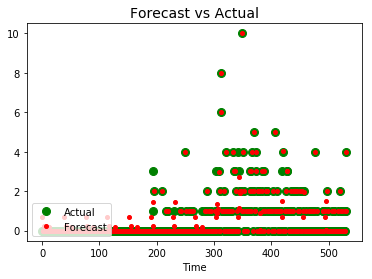

In [24]:
plt.title("Forecast vs Actual", fontsize=14)
plt.plot(pd.Series(np.ravel(y_test)), "bo", markersize=8, label="Actual", color='green')
plt.plot(pd.Series(np.ravel(y_pred)), "r.", markersize=8, label="Forecast", color='red')
plt.legend(loc="lower left")
plt.xlabel("Time")

plt.show()

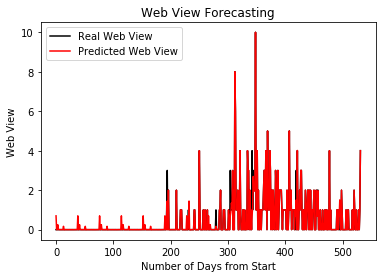

In [25]:
#Visualising Result
plt.figure
plt.plot(pd.Series(np.ravel(y_test)), color = 'black', label = 'Real Web View')
plt.plot(pd.Series(np.ravel(y_pred)), color = 'red', label = 'Predicted Web View')
plt.title('Web View Forecasting')
plt.xlabel('Number of Days from Start')
plt.ylabel('Web View')
plt.legend()
plt.show()

In [26]:
columnnames = train.columns.values
columnnames

array(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
       '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
       '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12',
       '2015-07-13', '2015-07-14', '2015-07-15', '2015-07-16',
       '2015-07-17', '2015-07-18', '2015-07-19', '2015-07-20',
       '2015-07-21', '2015-07-22', '2015-07-23', '2015-07-24',
       '2015-07-25', '2015-07-26', '2015-07-27', '2015-07-28',
       '2015-07-29', '2015-07-30', '2015-07-31', '2015-08-01',
       '2015-08-02', '2015-08-03', '2015-08-04', '2015-08-05',
       '2015-08-06', '2015-08-07', '2015-08-08', '2015-08-09',
       '2015-08-10', '2015-08-11', '2015-08-12', '2015-08-13',
       '2015-08-14', '2015-08-15', '2015-08-16', '2015-08-17',
       '2015-08-18', '2015-08-19', '2015-08-20', '2015-08-21',
       '2015-08-22', '2015-08-23', '2015-08-24', '2015-08-25',
       '2015-08-26', '2015-08-27', '2015-08-28', '2015-08-29',
       '2015-08-30', '2015-08-31', '2015-09-01', '2015-

In [27]:
columnnames.shape

(550,)

In [28]:
y_pred.shape

(14, 38, 1)

In [29]:
y_pred = np.around(y_pred)

In [30]:
y_pred

array([[[ 1.],
        [-0.],
        [-0.],
        [ 0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [-0.],
        [ 0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [ 0.],
        [-0.],
        [-0.],
        [ 0.],
        [ 0.]],

       [[ 1.],
        [-0.],
        [-0.],
        [ 0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [ 0.],
        [ 0.],
        [-0.],
        [ 0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        [ 0.],
        [-0.],
        

In [31]:
final = np.squeeze(y_pred)

In [32]:
final  = final.flatten()

In [33]:
final.shape

(532,)

In [34]:
col = columnnames[:532]

In [37]:
pred_views = pd.DataFrame(np.reshape(final, (1,len(final))),columns = col)
actual_views = sample.iloc[:,:532]

In [36]:
pred_views

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13
0,1.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,...,-0.0,-0.0,1.0,-0.0,0.0,0.0,1.0,0.0,1.0,4.0


In [38]:
actual_views

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13
13890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
